# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

In [222]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [282]:
data_directory = "../data/"
actors_df = pd.read_csv(data_directory+'actors.csv')
countries_df = pd.read_csv(data_directory+'countries.csv')
crew_df = pd.read_csv(data_directory+'crew.csv')
genres_df = pd.read_csv(data_directory+'genres.csv')
languages_df = pd.read_csv(data_directory+'languages.csv')
movies_df = pd.read_csv(data_directory+'movies.csv')
posters_df = pd.read_csv(data_directory+'posters.csv')
releases_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_df = pd.read_csv(data_directory+'studios.csv')
oscar_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

## Analizzo e pulisco i dati

Movies_df

In [283]:
movies_df.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

In [284]:
movies_df = movies_df[['id','name','date','minute','rating']].copy()

movies_df['date'] = pd.to_datetime(movies_df['date'], errors='coerce', format='%Y').fillna(pd.to_datetime(movies_df['date'],errors='coerce'))

movies_df.rename(columns={'name':'film_name','date':'film_date'}, inplace=True)

movies_df

,id,film_name,film_date,minute,rating
0,1000001,Barbie,2023-01-01,114.0,3.86
1,1000002,Parasite,2019-01-01,133.0,4.56
2,1000003,Everything Everywhere All at Once,2022-01-01,140.0,4.30
3,1000004,Fight Club,1999-01-01,139.0,4.27
4,1000005,La La Land,2016-01-01,129.0,4.09
...,...,...,...,...,...
941592,1941593,神笛,NaT,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaT,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaT,30.0,NaN
941595,1941596,重生,NaT,NaN,NaN


In [285]:
duplicati = movies_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

0


Oscar_df

In [286]:
oscar_df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

In [287]:
oscar_df = oscar_df[['year_film','year_ceremony','category','name','film','winner']].copy()

oscar_df['year_film'] = pd.to_datetime(oscar_df['year_film'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_film'],errors='coerce'))
oscar_df['year_ceremony'] = pd.to_datetime(oscar_df['year_ceremony'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_ceremony'],errors='coerce'))

oscar_df.rename(columns={'year_film':'film_date','year_ceremony':'ceremony_date', 'name':'person_country','film':'film_name'}, inplace=True)

oscar_df

,film_date,ceremony_date,category,person_country,film_name,winner
0,1927-01-01,1928-01-01,ACTOR,Richard Barthelmess,The Noose,False
1,1927-01-01,1928-01-01,ACTOR,Emil Jannings,The Last Command,True
2,1927-01-01,1928-01-01,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927-01-01,1928-01-01,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927-01-01,1928-01-01,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...
10884,2023-01-01,2024-01-01,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023-01-01,2024-01-01,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023-01-01,2024-01-01,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023-01-01,2024-01-01,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [288]:
duplicati = oscar_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

7


In [289]:
oscar_df.drop_duplicates(inplace=True)

## Quale paese ha vinto più oscar per miglior film in lingua straniera?

In [290]:
# Seleziono i vincitori di un Oscar per miglior film in lingua straniera
oscar_win_df = oscar_df.loc[
    (oscar_df['winner'] == True) & 
    (oscar_df['category'].isin(['FOREIGN LANGUAGE FILM']))].copy()
oscar_win_df

,film_date,ceremony_date,category,person_country,film_name,winner
3205,1956-01-01,1957-01-01,FOREIGN LANGUAGE FILM,"Italy; Dino De Laurentiis and Carlo Ponti, Pro...",La Strada,True
3313,1957-01-01,1958-01-01,FOREIGN LANGUAGE FILM,Italy,The Nights of Cabiria,True
3423,1958-01-01,1959-01-01,FOREIGN LANGUAGE FILM,France,My Uncle,True
3538,1959-01-01,1960-01-01,FOREIGN LANGUAGE FILM,France,Black Orpheus,True
3663,1960-01-01,1961-01-01,FOREIGN LANGUAGE FILM,Sweden,The Virgin Spring,True
...,...,...,...,...,...,...
9695,2014-01-01,2015-01-01,FOREIGN LANGUAGE FILM,Poland,Ida,True
9822,2015-01-01,2016-01-01,FOREIGN LANGUAGE FILM,Hungary,Son of Saul,True
9946,2016-01-01,2017-01-01,FOREIGN LANGUAGE FILM,Iran,The Salesman,True
10070,2017-01-01,2018-01-01,FOREIGN LANGUAGE FILM,Chile,A Fantastic Woman,True


In [291]:
#Rinomino dei paesi 
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Union of Soviet Socialist Republics', 'Russia')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Federal Republic of Germany', 'Germany')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Italy; Dino De Laurentiis and Carlo Ponti, Producers', 'Italy')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')

In [294]:
#Conto quante occorrenze ha ogni paese 
conteggi = oscar_win_df['person_country'].value_counts()

conteggi_df = conteggi.reset_index()
conteggi_df.columns = ['country', 'count']  

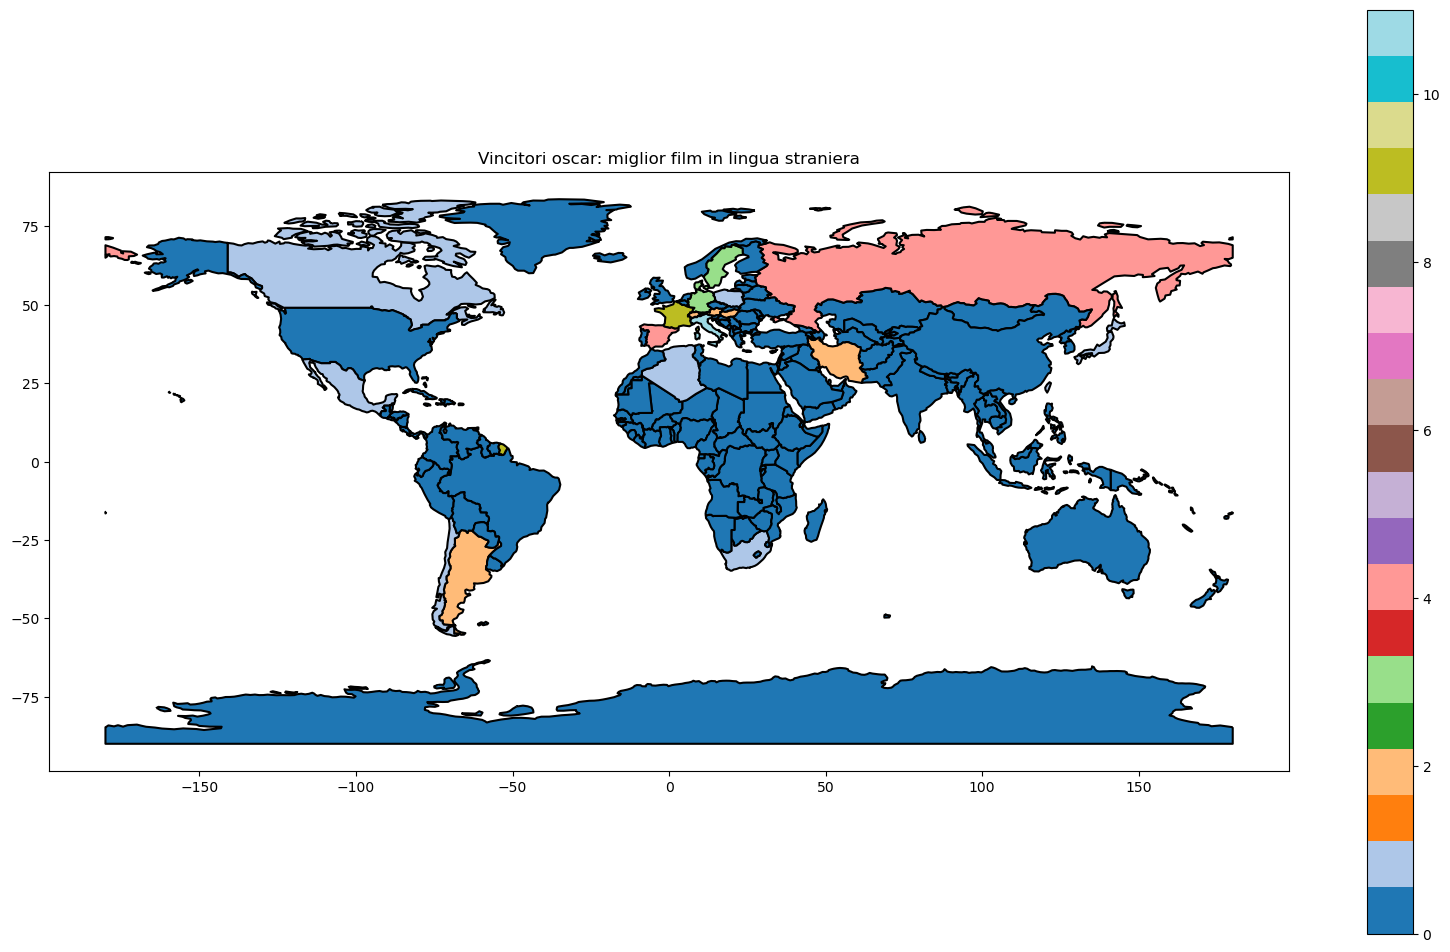

In [295]:
#Rappresento graficamente 
world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')

merged = world.merge(conteggi_df,how='left',left_on='NAME',right_on='country')
merged['count']=merged['count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(20, 12))
merged.plot(column='count', ax=ax, legend=True,cmap='tab20',edgecolor='black',linewidth=1.5, figsize=(15,10))
plt.title('Vincitori oscar: miglior film in lingua straniera')
plt.show()

## Chi ha prodotto più film?

## La bellezza di un film, può essere influenzata dalla durata?

## Nel tempo come si è evoluta la durata media dei film?